In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from data_gmm import *
from plots import *
import math
from torch.distributions.uniform import Uniform

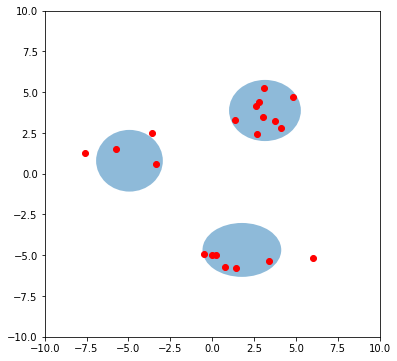

0


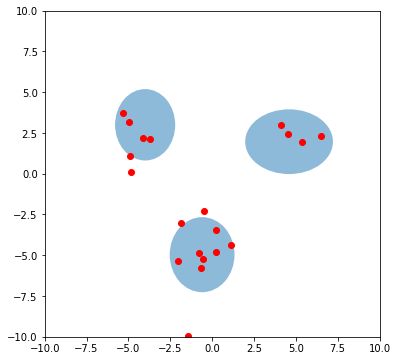

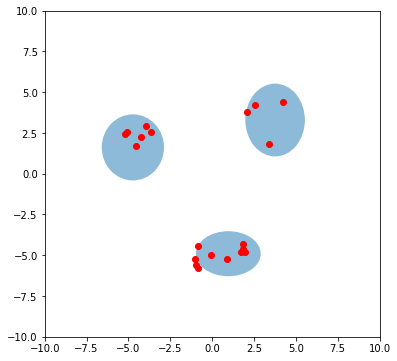

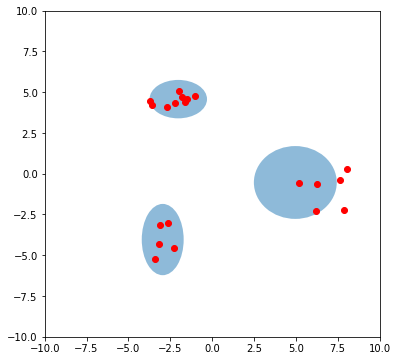

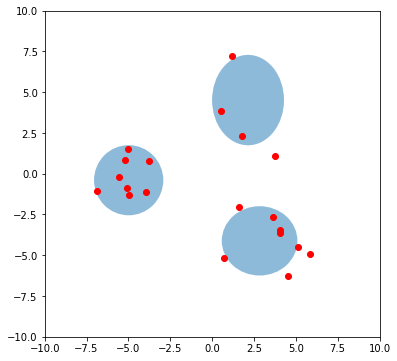

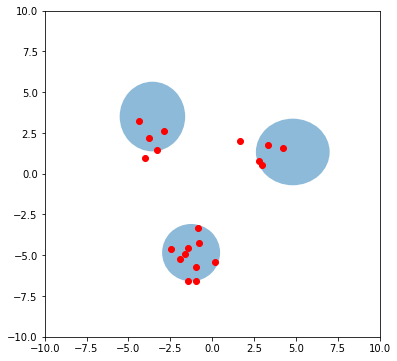

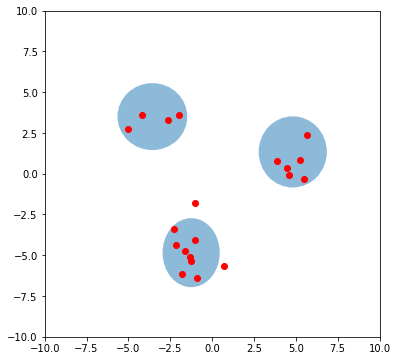

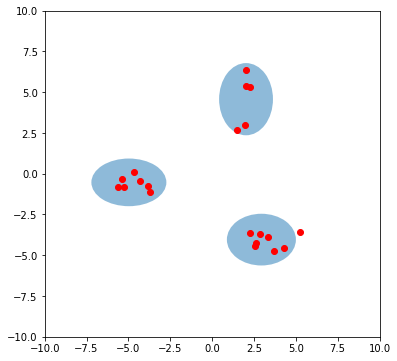

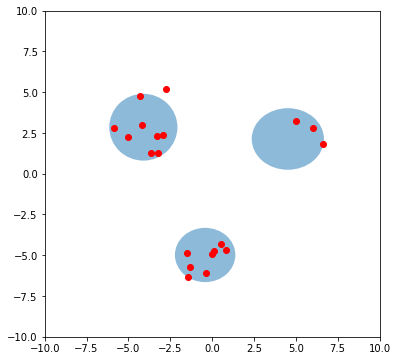

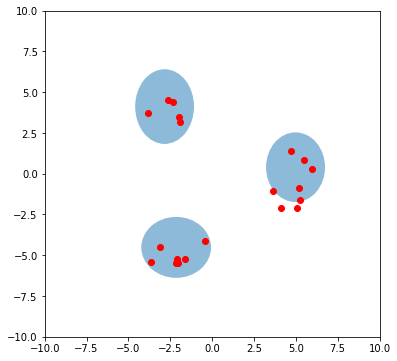

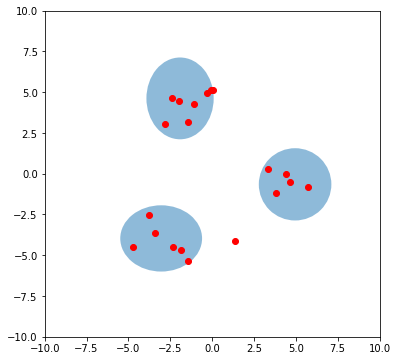

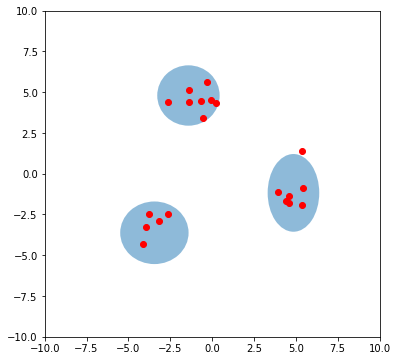

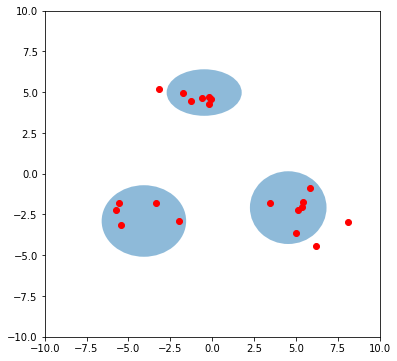

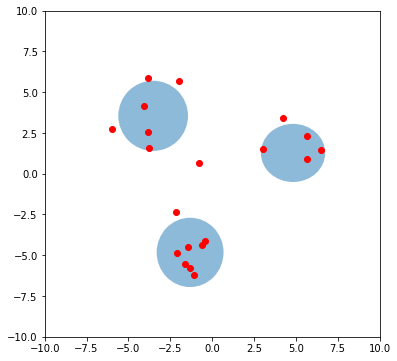

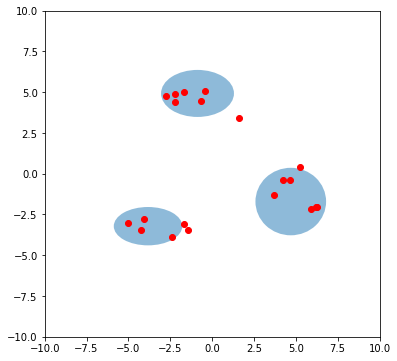

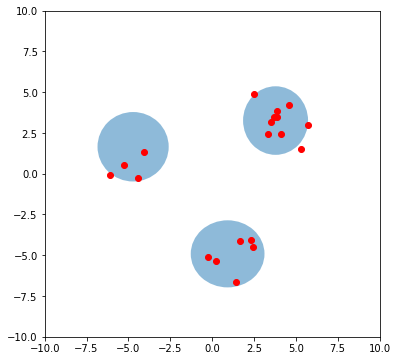

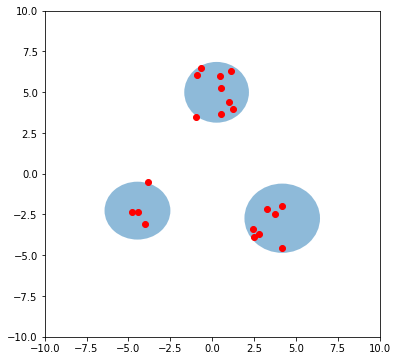

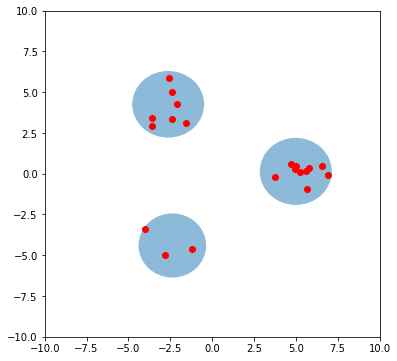

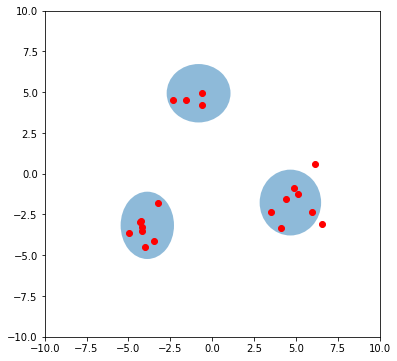

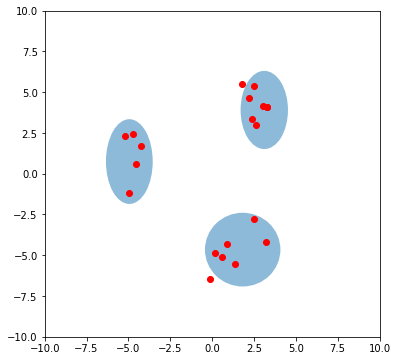

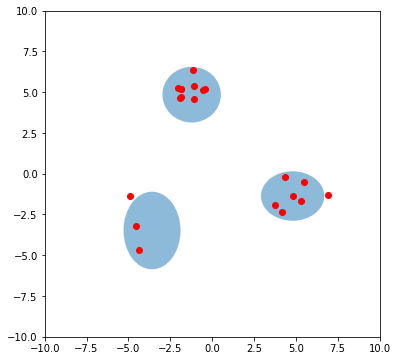

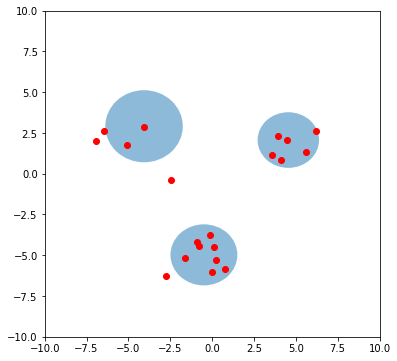

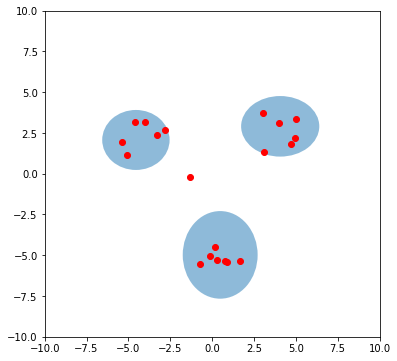

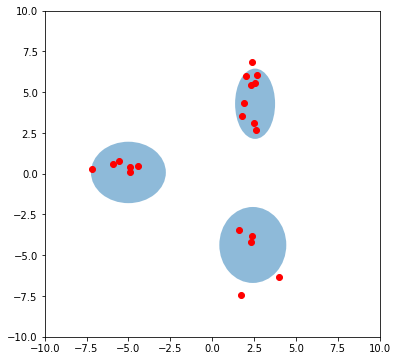

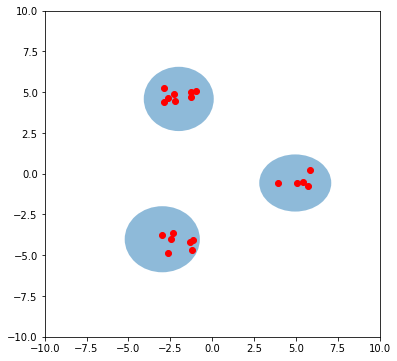

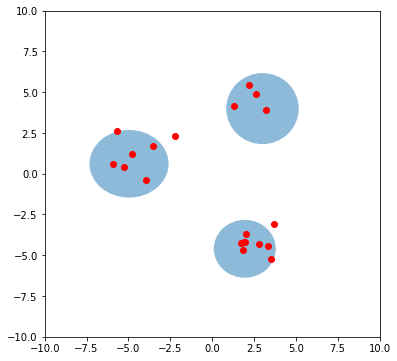

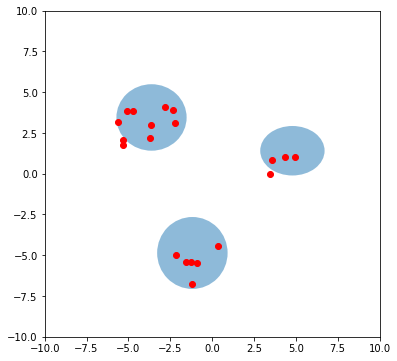

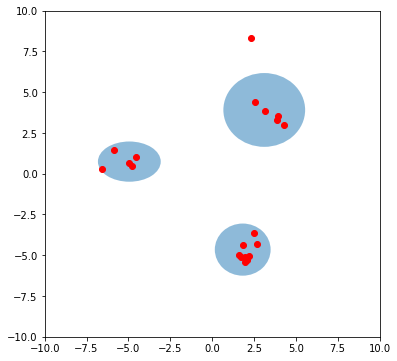

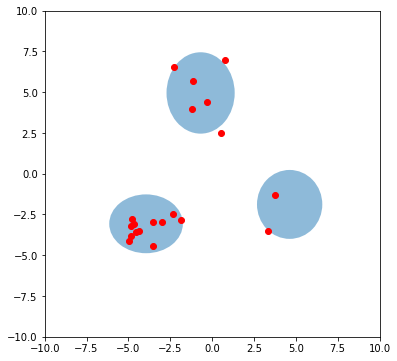

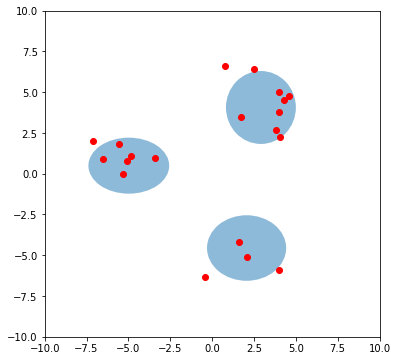

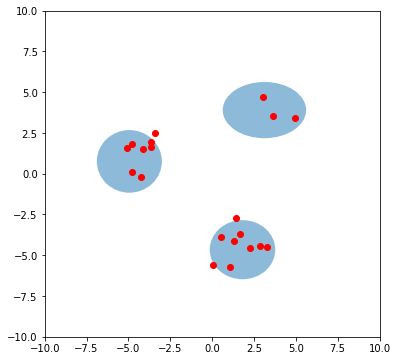

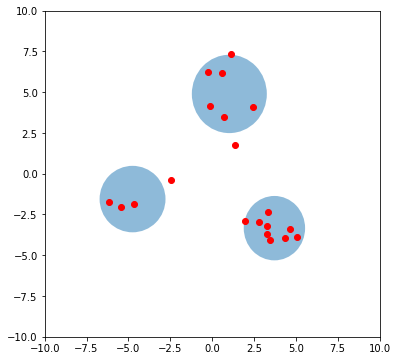

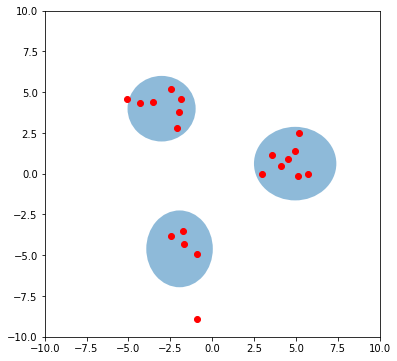

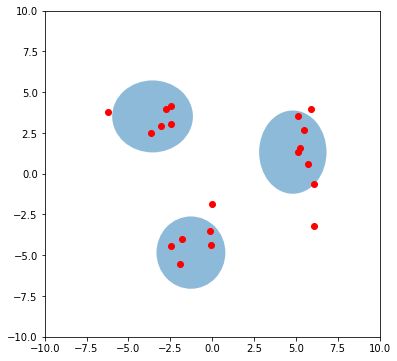

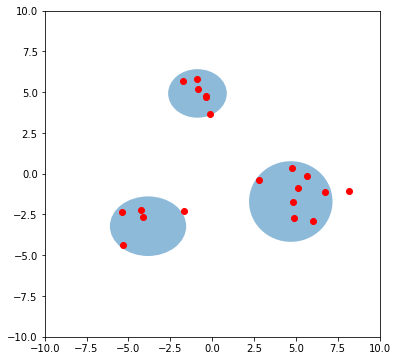

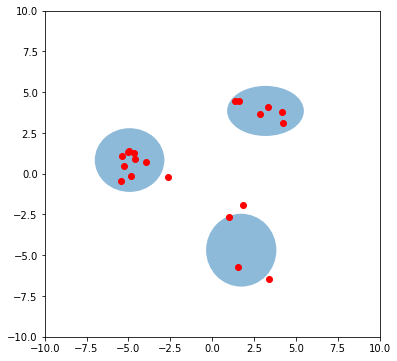

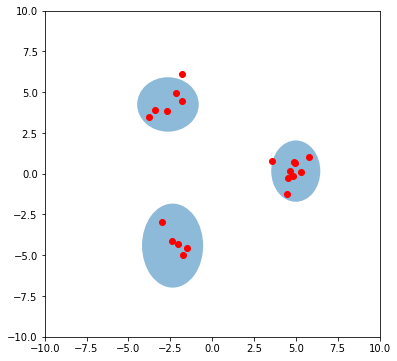

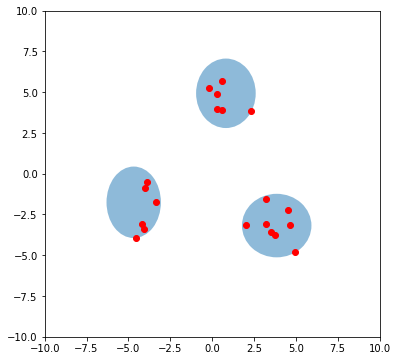

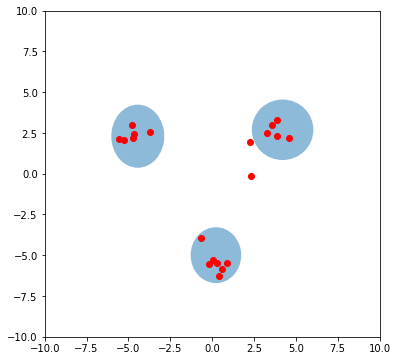

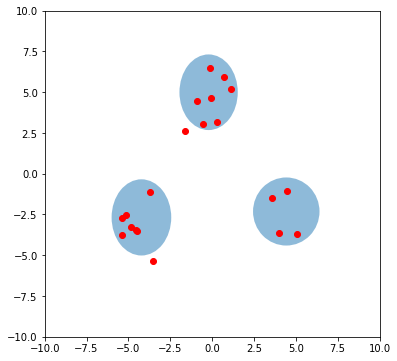

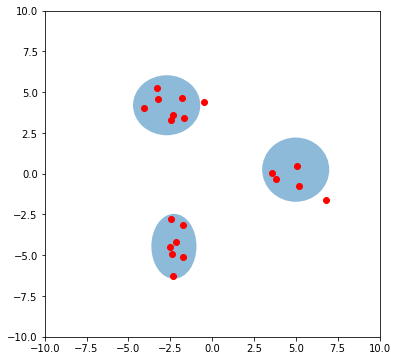

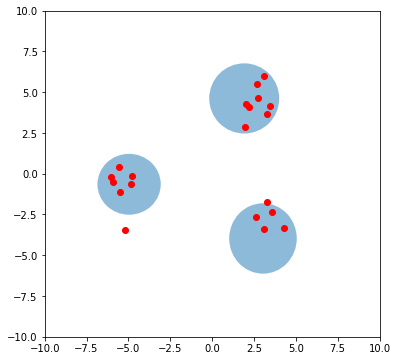

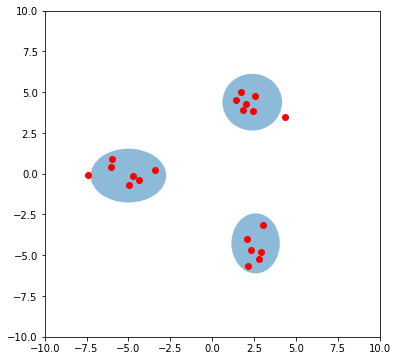

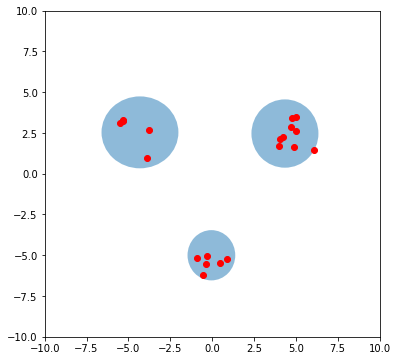

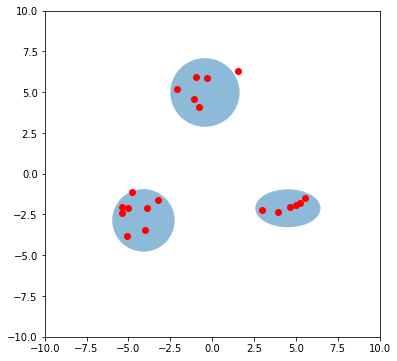

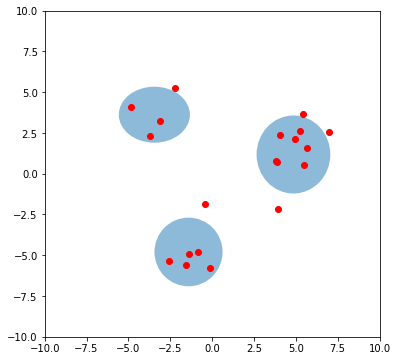

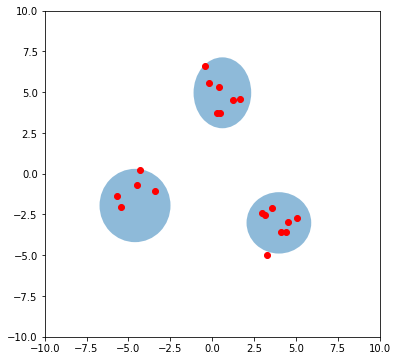

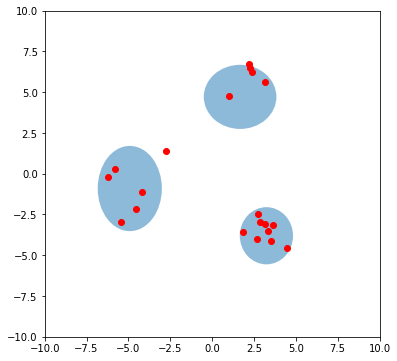

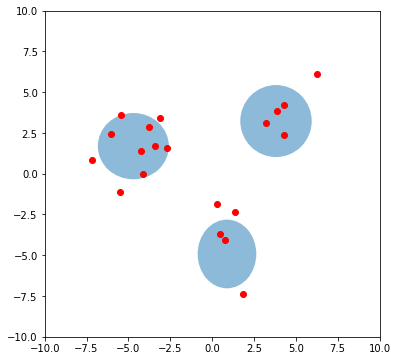

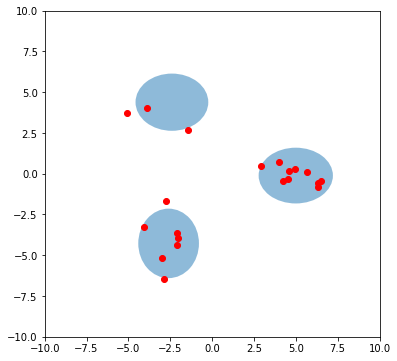

In [8]:
T = 20
K = 3
D = 2
num_seqs = 50
radius = 5.0
Ys = np.zeros((num_seqs, T, D))
Zs_true = np.zeros((num_seqs, T, K))
Mus = np.zeros((num_seqs, K, D))

for n in range(num_seqs):
    ind = Uniform(0, 2*math.pi).sample().item()
    Y, mus_true, covs_true, Z, Pi = sampling_gmm(T, K, D, ind, radius, prior_covs=True)
    covs_full = torch.zeros((K, D, D))
    for k in range(K):
        covs_full[k] = torch.diag(covs_true[k])
    plot_clusters(Y, mus_true, covs_full)
    Ys[n] = Y.data.numpy()
    Zs_true[n] = Z.data.numpy()
    Mus[n] = mus_true.data.numpy()
    if n % 100 == 0:
        print(n)

In [5]:
np.save('gmm_dataset2/sequences', Ys)
np.save('gmm_dataset2/states', Zs_true)
np.save('gmm_dataset2/means', Mus)
np.save('gmm_dataset2/covariances', covs_true.data.numpy())
np.save('gmm_dataset2/init', Pi.data.numpy())

In [ ]:
plot_clusters(Y, mus_true, covs_true)